In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

#area_data = np.load('/work/a06/tsuda/m1//12grid_area_result.npy')
years = [900, 1400, 1700, 1850, 1950, 2000]
class_labels = {}  # 辞書型で初期化

for year in years:
	
	pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
	pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')
	total_population_per_class = np.sum(pop_count_data[pop_count_data >= 0])
	flat_population_density = pop_density_data.flatten()
	valid_indices = np.where(flat_population_density >= 0)
	sorted_indices = np.argsort(flat_population_density[valid_indices])
	sorted_population_density = flat_population_density[valid_indices][sorted_indices]
	sorted_grid_locations = np.column_stack(np.unravel_index(valid_indices[0][sorted_indices], pop_density_data.shape))
	temp_class_labels = [0]  # 一時リスト
	current_total_population = 0
	total_population = [int(total_population_per_class * 10 / 100),
						int(total_population_per_class * 80 / 300),
						int(total_population_per_class * 80 / 300),
						int(total_population_per_class * 80 / 300),
						int(total_population_per_class * 10 / 100)]
	for i in range(4):
		if i == 0:
			target_population = total_population_per_class * 10 / 100
		if i == 1:
			target_population = total_population_per_class * 110 / 300
		if i == 2:
			target_population = total_population_per_class * 190 / 300
		if i == 3:
			target_population = total_population_per_class * 270 / 300
		for index in sorted_grid_locations:
			p, k = index
			current_total_population += pop_count_data[p, k]
			if current_total_population >= target_population:
				temp_class_labels.append(pop_density_data[p, k])
				break
		current_total_population = 0
	temp_class_labels.append(np.max(pop_density_data))
	class_labels[year] = np.array(temp_class_labels)  # 辞書に追加
	print(class_labels[year])
# class_labels辞書をループして、各年のクラスラベルをファイルに保存
for year, labels in class_labels.items():
	filename = f'class_labels_{year}.npy'  # ファイル名を指定
	np.save(filename, labels)  # ファイルに保存

[   0.            2.01381324   12.16462678   31.26868494  105.21744622
 1553.57518695]
[0.00000000e+00 2.69868387e+00 1.62257331e+01 3.82631886e+01
 1.14095860e+02 2.83323240e+03]
[0.00000000e+00 4.25663756e+00 2.71925354e+01 5.85037467e+01
 1.65514177e+02 7.98027126e+03]
[0.00000000e+00 1.05905256e+01 6.25487457e+01 1.59329916e+02
 3.91698209e+02 1.86462107e+04]
[0.00000000e+00 2.14210981e+01 1.22271833e+02 3.49409238e+02
 1.56550584e+03 4.96931647e+04]
[    0.            55.79778257   351.41365891  1048.0251299
  6296.06693171 55683.9844728 ]


(array([], dtype=int64), array([], dtype=int64))
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


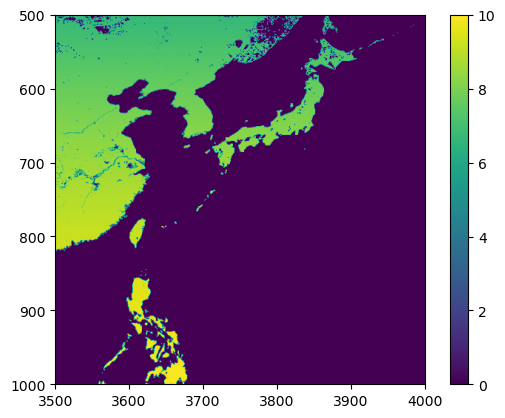

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict


area_data = np.load('/work/a06/tsuda/m1//12grid_area_result.npy')

#陸地面積による重みづけを導入したい。人口/人口密度で陸地面積を計算
land_area = np.zeros((2160, 4320))
#陸地ではないところにはnanを入れる
import numpy as np

land_area[(pop_density_data > 0) & (pop_count_data > 0)] = pop_count_data[(pop_density_data > 0) & (pop_count_data > 0)] / pop_density_data[(pop_density_data > 0) & (pop_count_data > 0)]
land_area[(pop_density_data <= 0) | (pop_count_data <= 0)] = np.nan
#nunを除いて、対象陸地面積が一番小さなグリッド面積の何倍かを計算
area_ratio = land_area / area_data.max() * 10
area_ratio[(pop_density_data <= 0) | (pop_count_data <= 0)]=np.nan


# NaNを0に置き換える
area_ratio = np.nan_to_num(area_ratio, nan=0.0)

# 四捨五入して整数型に変換
grid_counts = np.round(area_ratio).astype(int)


# grid_countsが負になっているものがあるかをチェック、そのグリッドのland_areaとarea_dataを表示
negative_indices = np.where(grid_counts < 0)
print(negative_indices)
print(np.min(grid_counts))

print(area_ratio)

#area_ratioを描画
plt.imshow(area_ratio)
plt.xlim()
plt.colorbar()
plt.xlim(3500,4000)
plt.ylim(1000,500)
plt.show()



In [3]:
import numpy as np
from collections import Counter, OrderedDict

years = [900, 1400, 1700, 1850, 1950, 2000]
class_labels = {}
pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')

# 文字列を数値にマッピングする辞書
climate_class_mapping = {
    'Af': 1, 'Am': 2, 'Aw': 3, 'BW': 4, 'BSh': 5, 'BSk': 6,
    'Cs': 7, 'Cw': 8, 'Cfa': 9, 'Cfb': 10, 'Cfc': 11,
    'Ds': 12, 'Dw': 13, 'Dfa': 14, 'Dfb': 15, 'Dfc': 16, 'Dfd': 17,
    'ET': 18, 'EF': 19, 'nan': 0,
}

for year in years:
    # 現状、climate_classはそれぞれ180×360の配列であるから、それを2160×4320に変換する
    climate_data = np.load(f'/work/a06/tsuda/m1/climate_class_{year}.npy', allow_pickle=True)
    new_climate_data = np.zeros((2160, 4320))

    # 180×360のデータの1グリッドを、12×12に分割して、それぞれのグリッドに同じ文字を入れる
    for i in range(180):
        for j in range(360):
            # 文字列を数値に変換
            climate_value = climate_data[i, j]
            if climate_value in climate_class_mapping:
                new_climate_data[i*12:(i+1)*12, j*12:(j+1)*12] = climate_class_mapping[climate_value]
            else:
                # nanなどの値は0にマッピング
                new_climate_data[i*12:(i+1)*12, j*12:(j+1)*12] = climate_class_mapping['nan']
    # 今数字になっているnew_climate_dataを文字列にもどす
    reverse_climate_class_mapping = {
        1: 'Af', 2: 'Am', 3: 'Aw', 4: 'BW', 5: 'BSh', 6: 'BSk',
        7: 'Cs', 8: 'Cw', 9: 'Cfa', 10: 'Cfb', 11: 'Cfc',
        12: 'Ds', 13: 'Dw', 14: 'Dfa', 15: 'Dfb', 16: 'Dfc', 17: 'Dfd',
        18: 'ET', 19: 'EF', 0: 'nan'
    }
    #climate_class_order = list(reverse_climate_class_mapping.keys())

    # new_climate_dataの数値を文字列に変換
    new_climate_data_str = np.vectorize(reverse_climate_class_mapping.get)(new_climate_data)

    # 変換結果を表示
    print(new_climate_data_str)

    #print(new_climate_data.shape)
    np.save(f'climate_class_{year}_12grid.npy', new_climate_data_str)

    


[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ...
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']]
[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ...
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']]
[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ...
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']]
[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ...
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']]
[['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'EF' ... 'EF' 'EF' 'EF']
 ['EF' 'EF' 'E

In [3]:
import numpy as np
from collections import Counter, OrderedDict
repeated_data = {}
years = [900, 1400, 1700, 1850, 1950, 2000]
for year in years:
    pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
    pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')
    # Climate colors and order
    climate_colors = OrderedDict({
        'Af': (255/255, 0/255, 0/255),
        'Am': (255/255, 165/255, 0/255),
        'Aw': (255/255, 255/255, 0/255),
        'BW': (214/255, 164/255, 96/255),
        'BSh': (218/255, 165/255, 32/255),
        'BSk': (184/255, 134/255, 11/255),
        'Cs': (143/255, 188/255, 143/255),
        'Cw': (102/255, 205/255, 170/255),
        'Cfa': (154/255, 205/255, 50/255),
        'Cfb': (0/255, 100/255, 0/255),
        'Cfc': (0/255, 128/255, 0/255),
        'Ds': (220/255, 220/255, 220/255),
        'Dw': (211/255, 211/255, 211/255),
        'Dfa': (192/255, 192/255, 192/255),
        'Dfb': (169/255, 169/255, 169/255),
        'Dfc': (128/255, 128/255, 128/255),
        'Dfd': (169/255, 169/255, 169/255),
        'ET': (112/255, 128/255, 144/255),
        'EF': (0/255, 0/255, 0/255)
    })

    # Climate class order
    climate_class_order = list(climate_colors.keys())
    #print(list(climate_colors.keys()))
    
    class_labels = np.load(f'class_labels_{year}.npy')
    print(class_labels[-2])
    
    new_climate_data_str = np.load(f'climate_class_{year}_12grid.npy')
    lower_bound = class_labels[-2]
    upper_bound = class_labels[-1]
    indices = np.where((lower_bound <= pop_density_data) & (pop_density_data < upper_bound))
    np.save(f'grid_number_{year}',(len(indices[1])))
    print(np.sum(pop_count_data[indices])/np.sum(pop_count_data[pop_count_data >= 0]))
    filtered_values = new_climate_data_str[indices]
    #class_data2[i] = filtered_values
    repeated_values = np.repeat(filtered_values, grid_counts[indices])
    # repeated_dataに追加
    repeated_data[year] = repeated_values
    #保存
    np.save(f'repeated_values_{year}', repeated_values)
print(repeated_data[900])


105.217446218
0.09971886384874522
114.095860227
0.09965696575761766
165.514176707
0.09924246950167791
391.698209441
0.09918258929624575
1565.50583689
0.09891243990190436
6296.06693171
0.09961916610026383
['Dfb' 'Dfb' 'Dfb' ... 'BSk' 'BSk' 'BSk']


In [58]:
print(repeated_data[1400])

['Dfc' 'Dfc' 'Dfc' ... 'BSh' 'BSh' 'BSh']


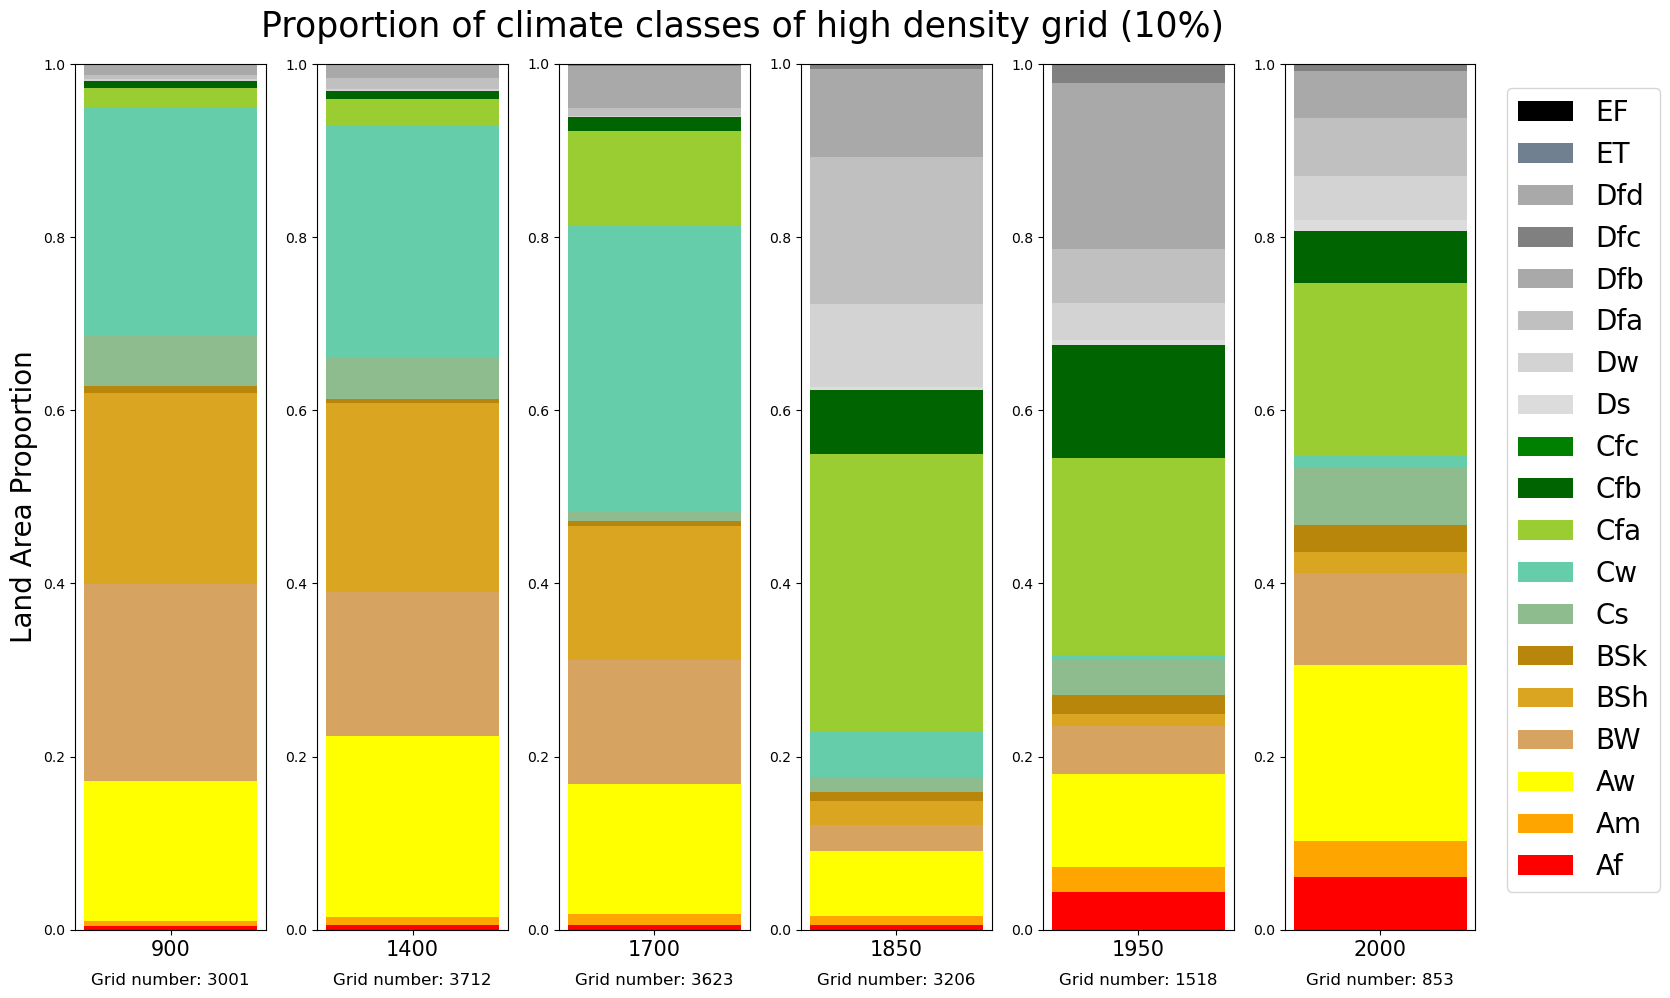

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

# 気候クラスとその色の定義
climate_colors = OrderedDict({
    'Af': (255/255, 0/255, 0/255),
    'Am': (255/255, 165/255, 0/255),
    'Aw': (255/255, 255/255, 0/255),
    'BW': (214/255, 164/255, 96/255),
    'BSh': (218/255, 165/255, 32/255),
    'BSk': (184/255, 134/255, 11/255),
    'Cs': (143/255, 188/255, 143/255),
    'Cw': (102/255, 205/255, 170/255),
    'Cfa': (154/255, 205/255, 50/255),
    'Cfb': (0/255, 100/255, 0/255),
    'Cfc': (0/255, 128/255, 0/255),
    'Ds': (220/255, 220/255, 220/255),
    'Dw': (211/255, 211/255, 211/255),
    'Dfa': (192/255, 192/255, 192/255),
    'Dfb': (169/255, 169/255, 169/255),
    'Dfc': (128/255, 128/255, 128/255),
    'Dfd': (169/255, 169/255, 169/255),
    'ET': (112/255, 128/255, 144/255),
    'EF': (0/255, 0/255, 0/255)
})

# 年代のリストを定義
years = [900, 1400, 1700, 1850, 1950, 2000]  

# 各年代のデータを格納するリスト
all_normalized_class_counts = []
grid_number = {}

for year in years:
    repeated_data = np.load(f'repeated_values_{year}.npy', allow_pickle=True)

    # 各年代のデータをカウント
    yearly_counts = Counter(repeated_data)

    # 各年代の総数を取得
    total_counts = sum(yearly_counts.values())

    # 各年代のデータを正規化
    normalized_class_counts = [yearly_counts[cl] / total_counts for cl in climate_colors.keys()]
    all_normalized_class_counts.append(normalized_class_counts)
    grid_number[year] = np.load(f'grid_number_{year}.npy')

# 各年のall_normalized_class_countsを積み上げ棒グラフで描画
fig = plt.figure(figsize=(15, 10))
aspect_ratio = 4  # アスペクト比（高さ/幅）

for idx, year in enumerate(years):
    ax = fig.add_subplot(1, len(years), idx + 1, aspect=aspect_ratio)
    bottom = 0
    for i, cl in enumerate(climate_colors.keys()):
        class_value = all_normalized_class_counts[idx][i]
        ax.bar(year, class_value, bottom=bottom, label=cl, color=climate_colors[cl])
        bottom += class_value
    ax.set_xticks([year])
    ax.set_xticklabels([str(year)], fontsize=15)
    ax.text(year, -0.05, f'Grid number: {grid_number[year]}', ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=12)

# グラフの装飾
axes = fig.get_axes()
axes[0].set_ylabel('Land Area Proportion', fontsize=20)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 0.5), loc='center left', prop={'size': 20})
plt.suptitle('Proportion of climate classes of high density grid (10%)', fontsize=25)

plt.tight_layout(rect=[0, 0, 1, 0.99])

# ここで保存
plt.savefig('final_result_10%.png', dpi=300)

# 表示
plt.show()


In [33]:
import numpy as np
from collections import Counter, OrderedDict

repeated_data = {}
years = [900, 1400, 1700, 1850, 1950, 2000]
A = {}

for year in years:
    pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
    pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')

    # Climate colors and order
    climate_colors = OrderedDict({
        'Af': (255/255, 0/255, 0/255),
        'Am': (255/255, 165/255, 0/255),
        'Aw': (255/255, 255/255, 0/255),
        'BW': (214/255, 164/255, 96/255),
        'BSh': (218/255, 165/255, 32/255),
        'BSk': (184/255, 134/255, 11/255),
        'Cs': (143/255, 188/255, 143/255),
        'Cw': (102/255, 205/255, 170/255),
        'Cfa': (154/255, 205/255, 50/255),
        'Cfb': (0/255, 100/255, 0/255),
        'Cfc': (0/255, 128/255, 0/255),
        'Ds': (220/255, 220/255, 220/255),
        'Dw': (211/255, 211/255, 211/255),
        'Dfa': (192/255, 192/255, 192/255),
        'Dfb': (169/255, 169/255, 169/255),
        'Dfc': (128/255, 128/255, 128/255),
        'Dfd': (169/255, 169/255, 169/255),
        'ET': (112/255, 128/255, 144/255),
        'EF': (0/255, 0/255, 0/255)
    })

    # Climate class order
    climate_class_order = list(climate_colors.keys())
    
    class_labels = np.load(f'class_labels_{year}.npy')
    print(class_labels[-2])
    
    new_climate_data_str = np.load(f'climate_class_{year}_12grid.npy')
    lower_bound = class_labels[-2]
    upper_bound = class_labels[-1]
    indices = np.where((lower_bound <= pop_density_data) & (pop_density_data < upper_bound))
    np.save(f'grid_number_{year}', (len(indices[0])))
    print(np.min(pop_count_data[indices]))
    pop_count = (pop_count_data / np.min(pop_count_data[indices]))*10
    pop_repeat = np.round(pop_count).astype(int)
    A[year] = np.round(np.sum(pop_count_data[indices])).astype(int)  # 修正箇所
    filtered_values = new_climate_data_str[indices]
    repeated_values = np.repeat(filtered_values, pop_repeat[indices])  # 修正箇所
    repeated_data[year] = repeated_values
    np.save(f'repeated_values_popcount10_{year}', repeated_values)

print(repeated_data[900])

105.217446218
206.350671229
114.095860227
137.339952463
165.514176707
313.083777038
391.698209441
475.363882566
1565.50583689
1809.74904709
6296.06693171
8439.73633962
['Dfb' 'Dfb' 'Dfb' ... 'BSk' 'BSk' 'BSk']


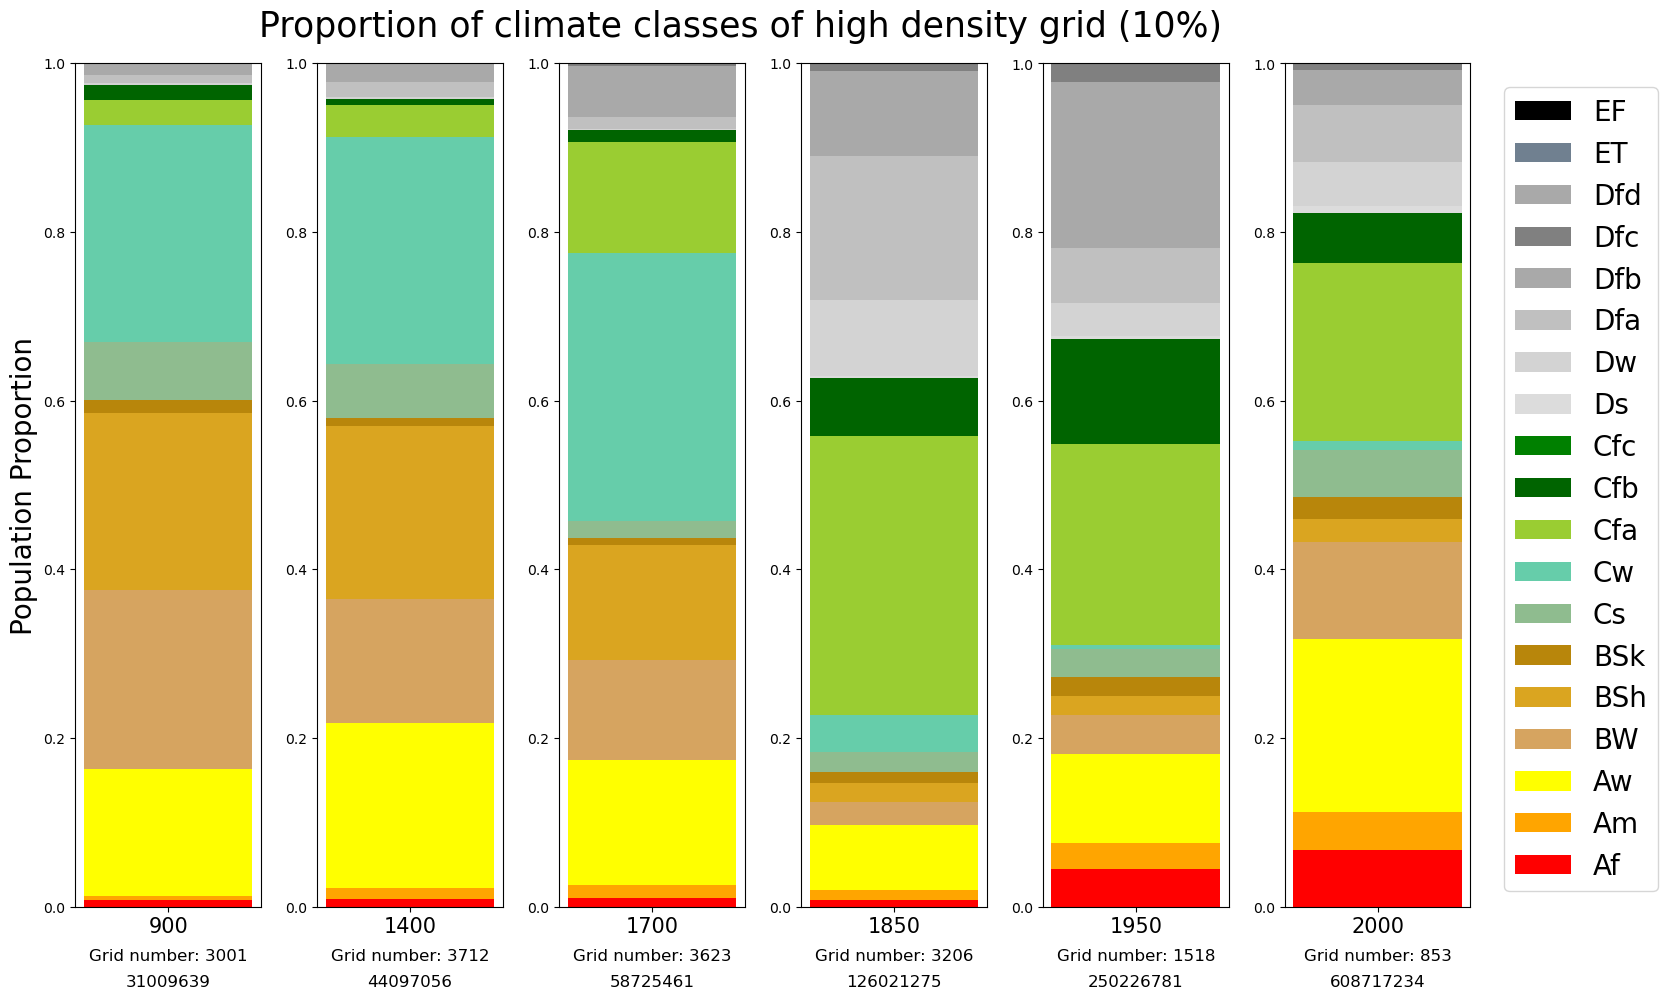

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

# 気候クラスとその色の定義
climate_colors = OrderedDict({
    'Af': (255/255, 0/255, 0/255),
    'Am': (255/255, 165/255, 0/255),
    'Aw': (255/255, 255/255, 0/255),
    'BW': (214/255, 164/255, 96/255),
    'BSh': (218/255, 165/255, 32/255),
    'BSk': (184/255, 134/255, 11/255),
    'Cs': (143/255, 188/255, 143/255),
    'Cw': (102/255, 205/255, 170/255),
    'Cfa': (154/255, 205/255, 50/255),
    'Cfb': (0/255, 100/255, 0/255),
    'Cfc': (0/255, 128/255, 0/255),
    'Ds': (220/255, 220/255, 220/255),
    'Dw': (211/255, 211/255, 211/255),
    'Dfa': (192/255, 192/255, 192/255),
    'Dfb': (169/255, 169/255, 169/255),
    'Dfc': (128/255, 128/255, 128/255),
    'Dfd': (169/255, 169/255, 169/255),
    'ET': (112/255, 128/255, 144/255),
    'EF': (0/255, 0/255, 0/255)
})

# 年代のリストを定義
years = [900, 1400, 1700, 1850, 1950, 2000]  

# 各年代のデータを格納するリスト
all_normalized_class_counts = []
grid_number = {}
pop_count_data = {}

for year in years:
    repeated_data = np.load(f'repeated_values_popcount10_{year}.npy', allow_pickle=True)
    pop_count_data[year] = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')  # 修正箇所
    # 各年代のデータをカウント
    yearly_counts = Counter(repeated_data)

    # 各年代の総数を取得
    total_counts = sum(yearly_counts.values())

    # 各年代のデータを正規化
    normalized_class_counts = [yearly_counts[cl] / total_counts for cl in climate_colors.keys()]
    all_normalized_class_counts.append(normalized_class_counts)
    grid_number[year] = np.load(f'grid_number_{year}.npy')
    
# 各年のall_normalized_class_countsを積み上げ棒グラフで描画
fig = plt.figure(figsize=(15, 10))
aspect_ratio = 4  # アスペクト比（高さ/幅）

for idx, year in enumerate(years):
    ax = fig.add_subplot(1, len(years), idx + 1, aspect=aspect_ratio)
    bottom = 0
    for i, cl in enumerate(climate_colors.keys()):
        class_value = all_normalized_class_counts[idx][i]
        ax.bar(year, class_value, bottom=bottom, label=cl, color=climate_colors[cl])
        bottom += class_value
    ax.set_xticks([year])
    ax.set_xticklabels([str(year)], fontsize=15)
    ax.text(year, -0.05, f'Grid number: {grid_number[year]}', ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=12)
    #各年のnp.sum(pop_count_data[indices])を表示
    ax.text(year, -0.08,A[year], ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=12)  # 修正箇所
# グラフの装飾
axes = fig.get_axes()
axes[0].set_ylabel('Population Proportion', fontsize=20)
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 0.5), loc='center left', prop={'size': 20})
plt.suptitle('Proportion of climate classes of high density grid (10%)', fontsize=25)

plt.tight_layout(rect=[0, 0, 1, 0.99])

# ここで保存
plt.savefig('final_result__pop_count_10%.png', dpi=300)

# 表示
plt.show()

In [31]:
print(np.sum(pop_count_data[1950][pop_count_data[1950] >= 0]))

2529780696.9863615
